## Using Bound Rectangle of minimum area from opencv library to find out the borders of the csDNA origami to calculate the position of the robot

In [1]:
#import 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

3564.5
2352.0
1348.0
1185.0
1070.5


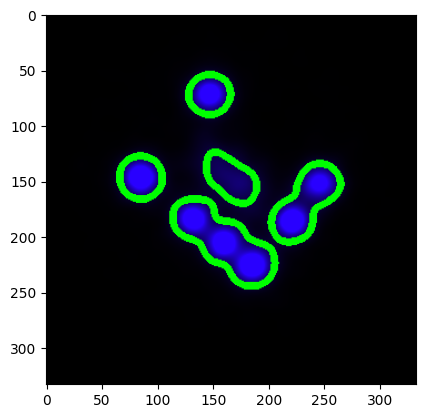

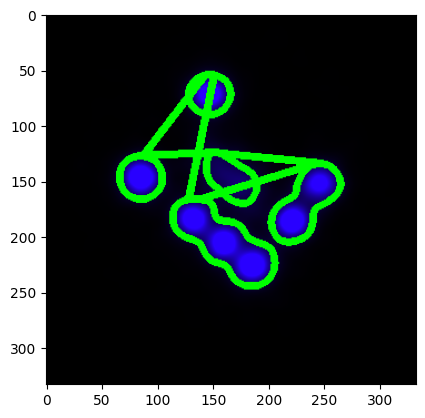

In [2]:
img_path = '/workspaces/CSDNA/Testing code/Robot Movement/Data/t=48avg.png'

# Load the images as an array from the Data folder 
img = cv.imread(img_path)
copy_1 = img.copy()

# Convert the image to grayscale
gray_1 = cv.cvtColor(copy_1, cv.COLOR_BGR2GRAY)

#apply a threshold to the image
ret,thresh_1 = cv.threshold(gray_1,20,255,cv.THRESH_TOZERO)

#find the contours of the image
contours_1, hierarchy = cv.findContours(thresh_1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#draw the contours on the image
cv.drawContours(copy_1, contours_1, -1, (0,255,0), 5)

#sorting the contours by area
contours_1 = sorted(contours_1, key = cv.contourArea, reverse = True)

#printing the area of each contour
for contour in contours_1 : 
    print(cv.contourArea(contour))

#display the image using matplotlib
print("Contours with Copy_1")
plt.imshow(copy_1)
plt.show()

#concatenate the contours into a single contour
single_contour = np.concatenate(contours_1)

#using the single_contour to draw the contour on the image
cv.drawContours(copy_1, [single_contour], -1, (0,255,0), 5)

#display the image using matplotlib
print("Single Contour with Copy_1")
plt.imshow(copy_1)
plt.show()

#using bounding rectangle to rotate the image to align properly
rect = cv.minAreaRect(single_contour)

box = cv.boxPoints(rect)
box = np.int0(box)

cv.drawContours(copy_1,[box],0,(0,0,255),2)

print("Bounding Rectangle with Copy_1")
plt.imshow(copy_1)
plt.show()


39.225677490234375


/tmp/ipykernel_2603/4108477020.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


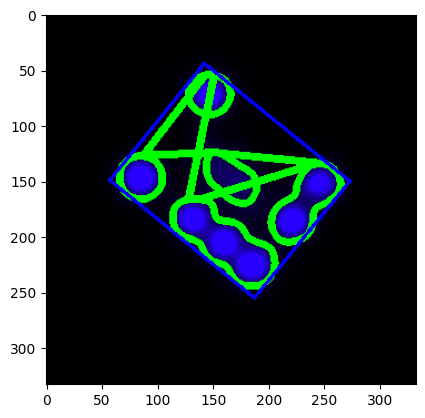

rect:  ((165.39166259765625, 150.09523010253906), (168.71804809570312, 135.58154296875), 39.225677490234375)


In [3]:
#using bounding rectangle to rotate the image to align properly
rect = cv.minAreaRect(single_contour)

box = cv.boxPoints(rect)
box = np.int0(box)

cv.drawContours(copy_1,[box],0,(0,0,255),2)

#printing the angle of rotation
print(rect[2])

plt.imshow(copy_1)
plt.show()
print("rect: ", rect)

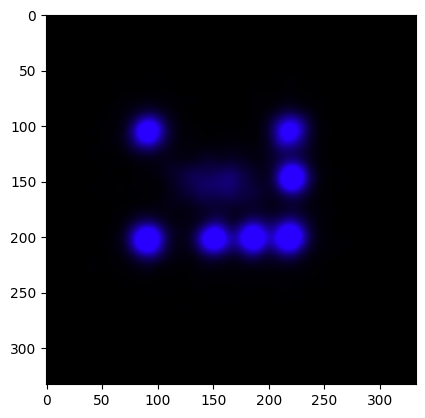

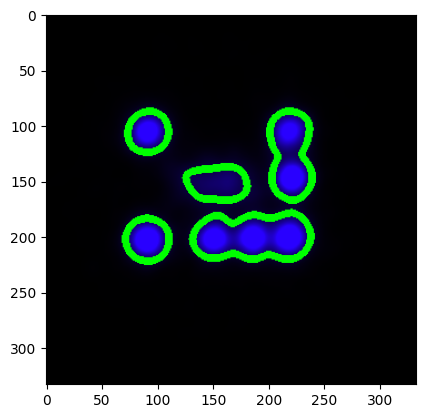

131 178


In [24]:
# Get the rotation angle and adjust it to ensure the longer side is parallel to the x-axis
angle = rect[2]
if rect[1][0] < rect[1][1]:
    angle += 90
rows,cols = img.shape[:2]
M = cv.getRotationMatrix2D((cols/2,rows/2),angle,1)
dst = cv.warpAffine(img,M,(cols,rows))

#making a copy of the rotated image
copy_2 = dst.copy()
copy_3 = dst.copy()

#showing the rotated image
plt.imshow(dst)
plt.show()

#drawing the contours on the rotated image copy_2
gray_2 = cv.cvtColor(copy_2, cv.COLOR_BGR2GRAY)
ret,thresh_2 = cv.threshold(gray_2,20,255,cv.THRESH_TOZERO)
contours_2, hierarchy = cv.findContours(thresh_2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(copy_2, contours_2, -1, (0,255,0), 5)

#sorting the contours by area
contours_2 = sorted(contours_2, key = cv.contourArea, reverse = True)

#showing the contours
plt.imshow(copy_2)
plt.show()

#finding the position of the first contour
x_1,y_1,w_1,h_1 = cv.boundingRect(contours_2[0])
print(x_1,y_1)


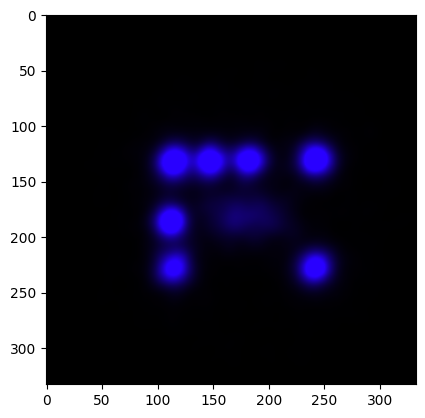

95 113


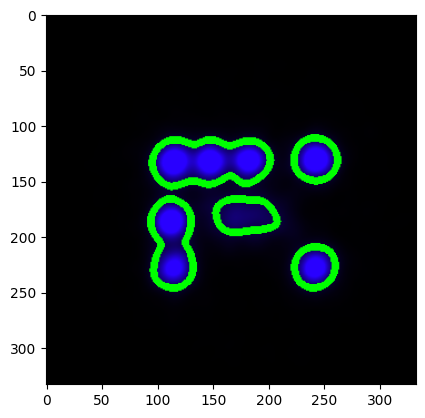

In [67]:
#rotating copy_3 by 180%
rows,cols = copy_3.shape[:2]
M = cv.getRotationMatrix2D((cols/2,rows/2),180,1)
dst_2 = cv.warpAffine(copy_3,M,(cols,rows))

#making a copy of the rotated image
copy_4 = dst_2.copy()

#showing the rotated image
plt.imshow(dst_2)
plt.show()

#drawing the contours on the rotated image copy_4
gray_3 = cv.cvtColor(copy_4, cv.COLOR_BGR2GRAY)
ret,thresh_3 = cv.threshold(gray_3,20,255,cv.THRESH_TOZERO)
contours_3, hierarchy = cv.findContours(thresh_3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(copy_4, contours_3, -1, (0,255,0), 5)

#sorting the contours by area
contours_3 = sorted(contours_3, key = cv.contourArea, reverse = True)

#printing the coordinates of the first contour
x_2,y_2,w_2,h_2 = cv.boundingRect(contours_3[0])
print(x_2,y_2)

#showing the contours
plt.imshow(copy_4)
plt.show()



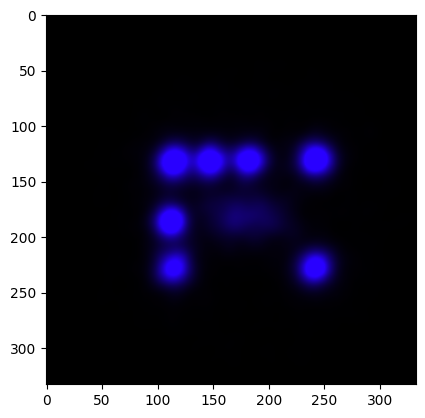

In [68]:
#if x_1, y_1 < x_2, y_2 then use final_img = dst else final_img = dst_2
if x_1 < x_2 and y_1 < y_2:
    final_img = dst
    
else:
    final_img = dst_2

#Final image copy avg image
final_avg_image = final_img.copy()

#showing the final image
plt.imshow(final_img)
plt.show()



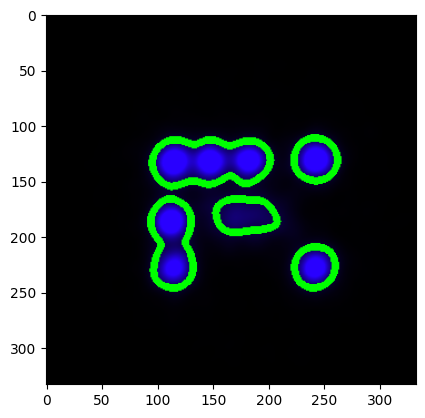

In [69]:
#contours on the final image
gray_4 = cv.cvtColor(final_img, cv.COLOR_BGR2GRAY)
ret,thresh_4 = cv.threshold(gray_4,20,255,cv.THRESH_TOZERO)
contours_4, hierarchy = cv.findContours(thresh_4, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(final_img, contours_4, -1, (0,255,0), 5)

#sorting the contours by area
contours_4 = sorted(contours_4, key = cv.contourArea, reverse = True)

#showing the contours
plt.imshow(final_img)
plt.show()


    


In [70]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import plotly.graph_objects as go

x = []
y = []
z = []

for i in range(0, len(data)):
    for j in range(0, len(data[i])):
        for contour in contours_4:
            if cv.pointPolygonTest(contour, (j, i), False) == 1:
                x.append(j)
                y.append(-i)
                z.append(data[i][j])

# Convert lists to numpy arrays for calculation
x = np.array(x)
y = np.array(y)
z = np.array(z)

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
        colorbar=dict(title='Pixel Intensity'),
        opacity=0.8
    )
)])

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X Label',
        yaxis_title='Y Label',
        zaxis_title='Z Label',
    ),
    title='Interactive 3D Plot of Pixel Intensities'   
)

# Rotate the plot by 180 degrees (adjust angles as needed)
fig.update_layout(scene_camera=dict(
    eye=dict(x=2, y=2, z=1)  # Change this as needed to adjust the view
))

fig.show()

In [57]:
import cv2 as cv
import numpy as np
import plotly.graph_objects as go

# Finding the rightmost contour
right_most_contour = max(contours_4, key=lambda contour: cv.boundingRect(contour)[0])

# Finding the second rightmost contour
second_right_most_contour = max(
    (contour for contour in contours_4 if contour is not right_most_contour),
    key=lambda contour: cv.boundingRect(contour)[0]
)

# Function to calculate the center of mass of a contour
def calculate_center_of_mass(contour, data):
    com_x = 0
    com_y = 0
    total_intensity = 0

    for i in range(len(data)):
        for j in range(len(data[i])):
            if cv.pointPolygonTest(contour, (j, i), False) == 1:
                com_x += j * data[i][j]
                com_y += i * data[i][j]
                total_intensity += data[i][j]

    com_x /= total_intensity
    com_y /= total_intensity

    return com_x, com_y

# Calculate the center of mass for the rightmost and second rightmost contours
com_right_most_x, com_right_most_y = calculate_center_of_mass(right_most_contour, data)
com_second_right_most_x, com_second_right_most_y = calculate_center_of_mass(second_right_most_contour, data)

# Generate the 3D scatter plot data
x = []
y = []
z = []

for i in range(len(data)):
    for j in range(len(data[i])):
        x.append(j)
        y.append(-i)
        z.append(data[i][j])

# Convert lists to numpy arrays for calculation
x = np.array(x)
y = np.array(y)
z = np.array(z)

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
        colorbar=dict(title='Pixel Intensity'),
        opacity=0.8
    )
)])

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X Label',
        yaxis_title='Y Label',
        zaxis_title='Z Label',
    ),
    title='Interactive 3D Plot of Pixel Intensities'
)

# Rotate the plot by 180 degrees (adjust angles as needed)
fig.update_layout(scene_camera=dict(
    eye=dict(x=2, y=2, z=1)  # Change this as needed to adjust the view
))

# Add the center of mass of the rightmost contour and the second rightmost contour
fig.add_trace(go.Scatter3d(
    x=[com_right_most_x, com_second_right_most_x],
    y=[-com_right_most_y, -com_second_right_most_y],
    z=[np.max(z)+5, np.max(z)+5],
    mode='markers',
    marker=dict(
        size=4,
        color='red',
    )
))

fig.show()

In [58]:
#picking the contour with lowest intensity
min_intensity = 255
min_intensity_contour = None
for contour in contours_4:
    x,y,w,h = cv.boundingRect(contour)
    intensity = np.mean(data[y:y+h, x:x+w])
    if intensity < min_intensity:
        min_intensity = intensity
        min_intensity_contour = contour

In [71]:
import cv2 as cv
import numpy as np
import plotly.graph_objects as go

# Assuming data and min_intensity_contour are already defined
# Drawing the center of the min_intensity_contour using weighted arithmetic mean of the contour using the pixel intensity as the weight mixi/ mi 
center_of_mass_x = 0
center_of_mass_y = 0

total_intensity = 0

for i in range(0, len(data)):
    for j in range(0, len(data[i])):
        if cv.pointPolygonTest(min_intensity_contour, (j, i), False) == 1:
            total_intensity += data[i][j]
            center_of_mass_x += j * data[i][j]
            center_of_mass_y += i * data[i][j]
            
center_of_mass_x /= total_intensity
center_of_mass_y /= total_intensity

# Ensure x, y, and z are arrays or lists
x = []
y = []
z = []

for i in range(0, len(data)):
    for j in range(0, len(data[i])):
        if cv.pointPolygonTest(min_intensity_contour, (j, i), False) == 1:
            x.append(j)
            y.append(i)
            z.append(data[i][j])

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
        colorbar=dict(title='Pixel Intensity'),
        opacity=0.8
    )
)])

# Add the center of mass as a red point
fig.add_trace(go.Scatter3d(
    x=[center_of_mass_x],
    y=[center_of_mass_y],
    z=[np.max(z)],  # Place it at the maximum intensity for visibility
    mode='markers',
    marker=dict(
        size=10,
        color='red'
    ),
    name='Center of Mass'
))

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X Label',
        yaxis_title='Y Label',
        zaxis_title='Z Label',
    ),
    title='Interactive 3D Plot of Pixel Intensities with Center of Mass'
)

# Rotate the plot by 180 degrees (adjust angles as needed)
fig.update_layout(scene_camera=dict(
    eye=dict(x=2, y=2, z=1)  # Change this as needed to adjust the view
))

fig.show()

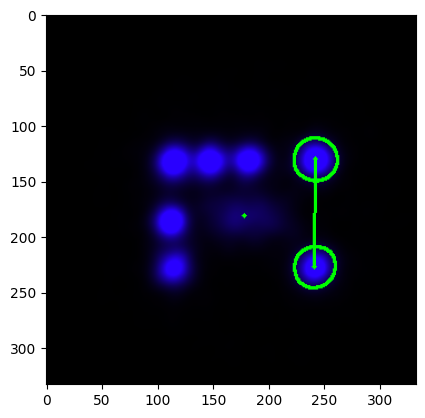

In [72]:
# adding the center of mass to the final_avg_image
cv.circle(final_avg_image, (int(center_of_mass_x), int(center_of_mass_y)), 2, (0,255, 0), -1)

#adding the rightmost and second rightmost contours to the final_avg_image
cv.drawContours(final_avg_image, [right_most_contour], -1, (0,255,0), 2)
cv.drawContours(final_avg_image, [second_right_most_contour], -1, (0,255,0), 2)

#adding the centers of the right most and the second right most contours
cv.circle(final_avg_image, (int(com_right_most_x), int(com_right_most_y)), 2, (0,255, 0), -1)
cv.circle(final_avg_image, (int(com_second_right_most_x), int(com_second_right_most_y)), 2, (0,255, 0), -1)

#drawing line through the centers of the rightmost and second rightmost contours
cv.line(final_avg_image, (int(com_right_most_x), int(com_right_most_y)), (int(com_second_right_most_x), int(com_second_right_most_y)), (0,255,0), 2)

#showing the final_avg_image
plt.imshow(final_avg_image)
plt.show()